In [1]:
!pip install -U kaleido

In [2]:
import kaleido
import plotly.io as pio

In [3]:
! pip install opendatasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
import seaborn as sns
import opendatasets as od #import opendatasets library

In [4]:
od.download("https://www.kaggle.com/datasets/darshanprabhu09/california-housing-dataset")
#andylyy , ff520ec7edf98cff0f0d10e926de3567

Skipping, found downloaded files in "./california-housing-dataset" (use force=True to force download)


In [5]:

from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('/Users/andyb/Downloads/housing.csv')


In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 1. EDA Process

In [8]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)

In [10]:
df.isna().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# **2. Descriptive Statistic**

In [12]:
numeric_df = df[['median_income','median_income','median_house_value']].astype(int)
for column in numeric_df:
    mean = numeric_df[column].mean()
    std = numeric_df[column].std()
    maximum = numeric_df[column].max()
    minimum = numeric_df[column].min()
    
    print(f'Mean value of {column}: {mean}')
    print(f'Standard Deviation of {column}: {std}')
    print(f'Max value of {column}: {maximum}')
    print(f'Min value of {column}: {minimum}')
    print('\n')

Mean value of median_income: median_income    3.392975
median_income    3.392975
dtype: float64
Standard Deviation of median_income: median_income    1.9322
median_income    1.9322
dtype: float64
Max value of median_income: median_income    15
median_income    15
dtype: int64
Min value of median_income: median_income    0
median_income    0
dtype: int64


Mean value of median_income: median_income    3.392975
median_income    3.392975
dtype: float64
Standard Deviation of median_income: median_income    1.9322
median_income    1.9322
dtype: float64
Max value of median_income: median_income    15
median_income    15
dtype: int64
Min value of median_income: median_income    0
median_income    0
dtype: int64


Mean value of median_house_value: 206855.81690891474
Standard Deviation of median_house_value: 115395.6158744132
Max value of median_house_value: 500001
Min value of median_house_value: 14999




In [13]:
correlation = df.corr()['median_house_value']

correlation #not very strong correlation with house value

/var/folders/h5/z9ryqq_s4qg3mvngs_wzc1mr0000gn/T/ipykernel_83672/4035776030.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['median_house_value']


longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049148
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [14]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# **3. Data Visualization**

<IPython.core.display.Javascript object>


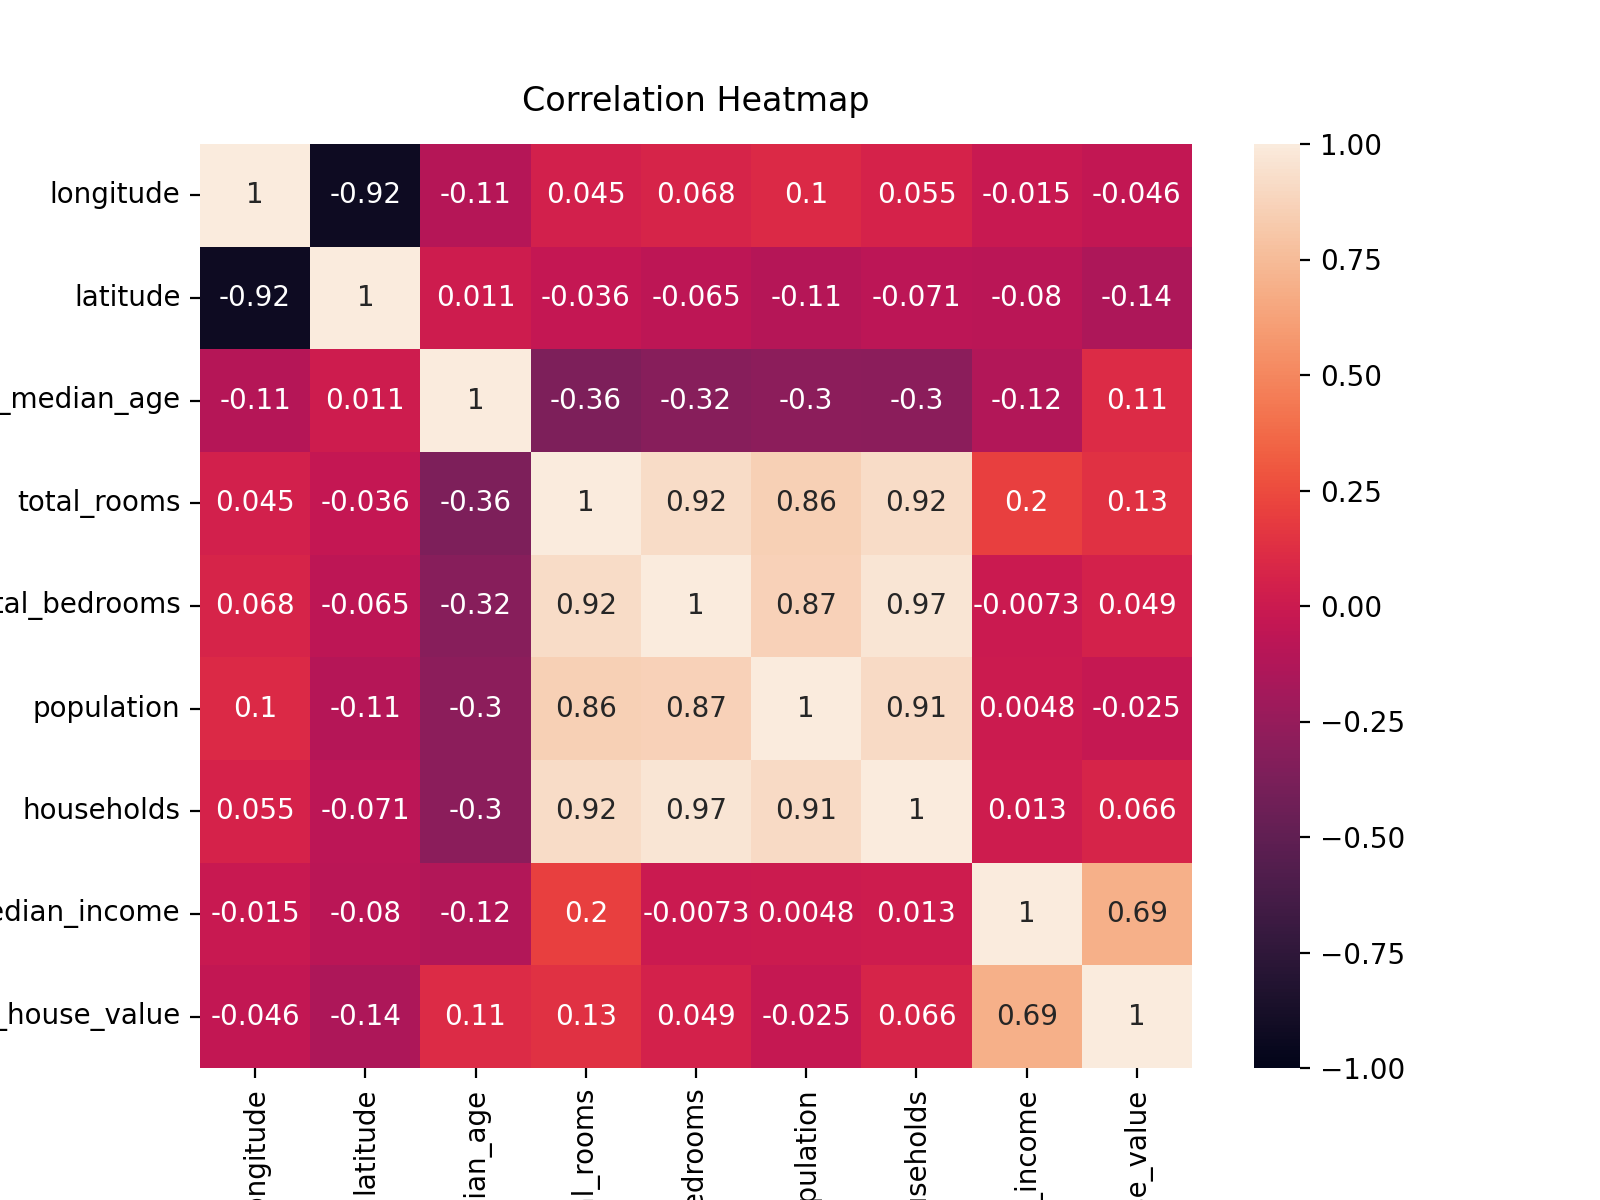

/var/folders/h5/z9ryqq_s4qg3mvngs_wzc1mr0000gn/T/ipykernel_83672/1559179522.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


In [15]:
plt.figure(figsize = (8,6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12); 
#strong relationship for total_rooms, total_bedrooms, population, households
#and relationship between median_income and median_house_value

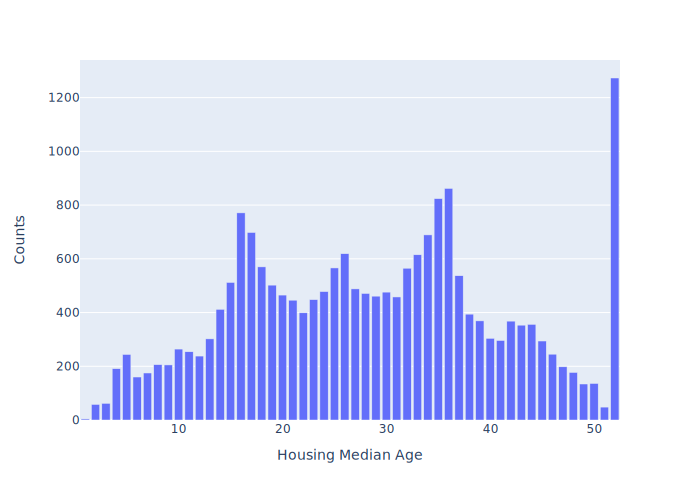

In [16]:
import plotly.express as px
housing_age = df['housing_median_age'].value_counts() #we have 1273 houses are 52 years old
fig = px.bar(x = housing_age.index, y = housing_age.values)
fig.update_layout(
    xaxis_title='Housing Median Age',
    yaxis_title='Counts'
)
fig.show('svg')

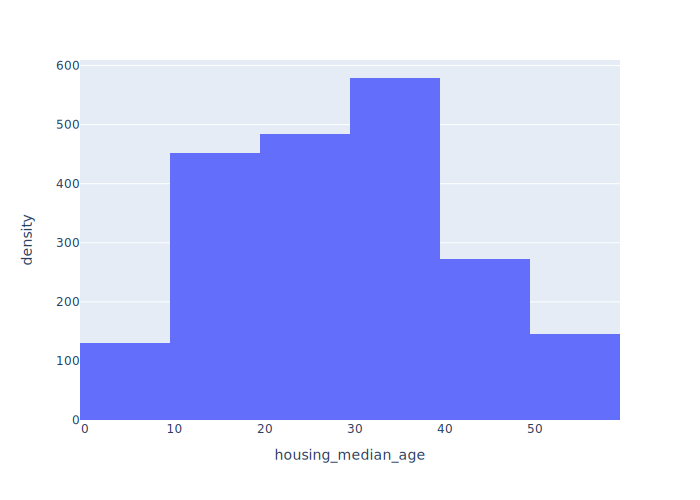

In [17]:

fig2 = px.histogram(df, x='housing_median_age', histnorm = 'density', nbins = 6)
fig2.show('svg')

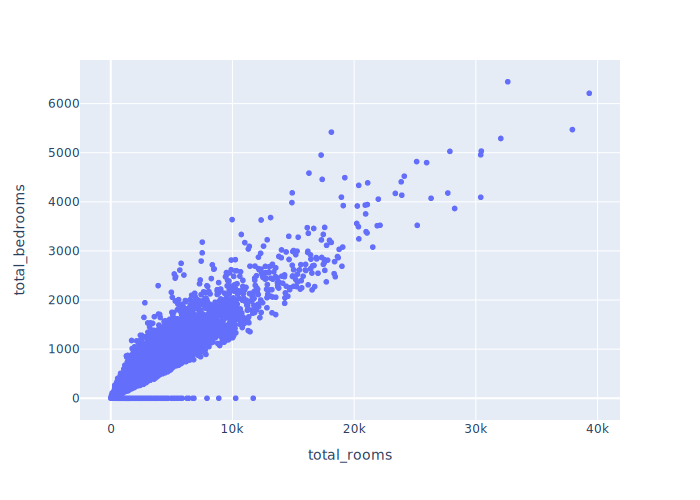

In [18]:
fig3 = px.scatter(df, x='total_rooms', y='total_bedrooms')
fig3.show('svg')

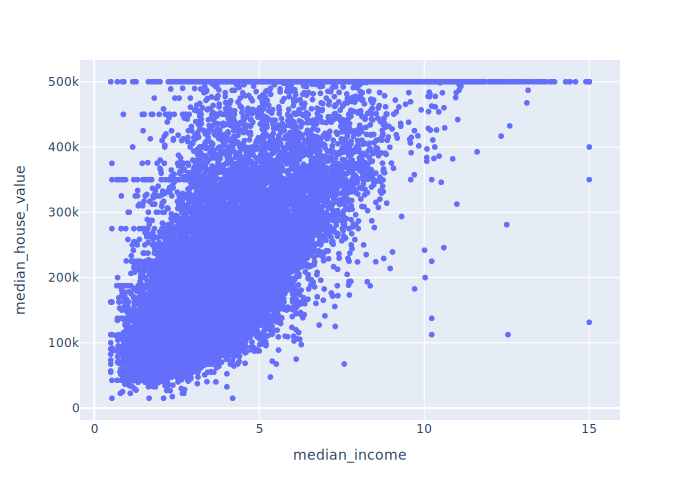

In [19]:
fig4 = px.scatter(df,x='median_income', y='median_house_value' ) #not clear correlation
fig4.show('svg')

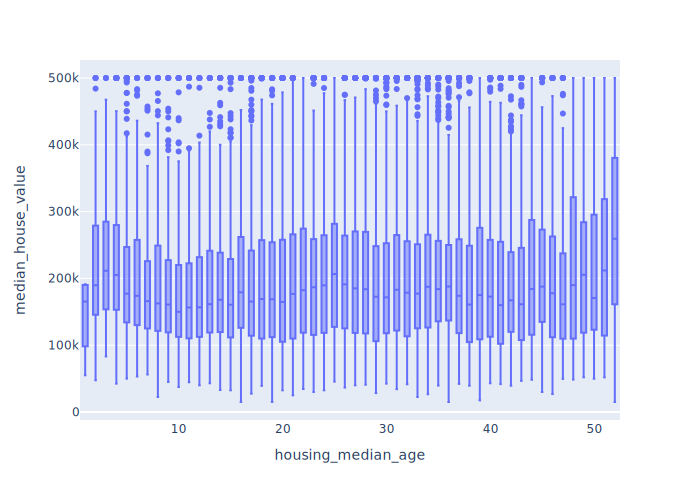

In [20]:
fig5 = px.box (df, x = 'housing_median_age', y= 'median_house_value')
fig5.show('svg')

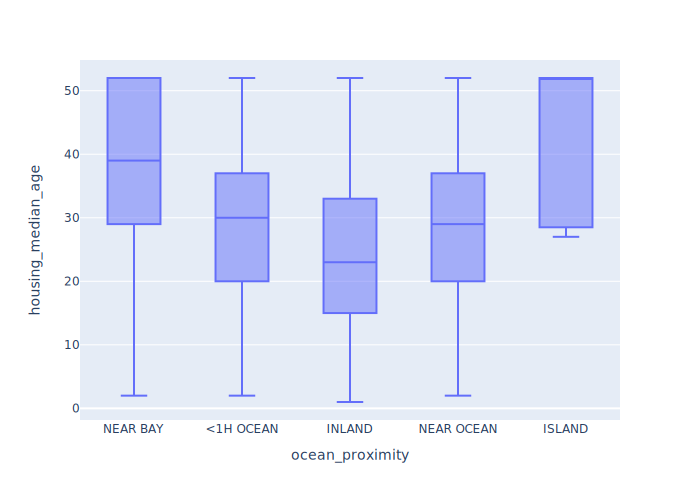

In [21]:
fig6 = px.box(df, x = 'ocean_proximity', y = 'housing_median_age')
fig6.show('svg')

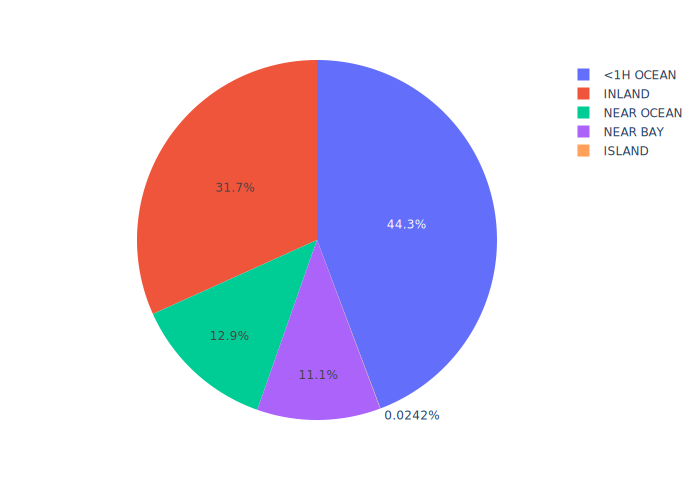

In [22]:
ocean = df['ocean_proximity'].value_counts().reset_index()
ocean.columns = ['ocean_proximity', 'count']

fig7 = px.pie(ocean, values='count', names='ocean_proximity')
fig7.show('svg')
#44% housing fall in <1h Ocean

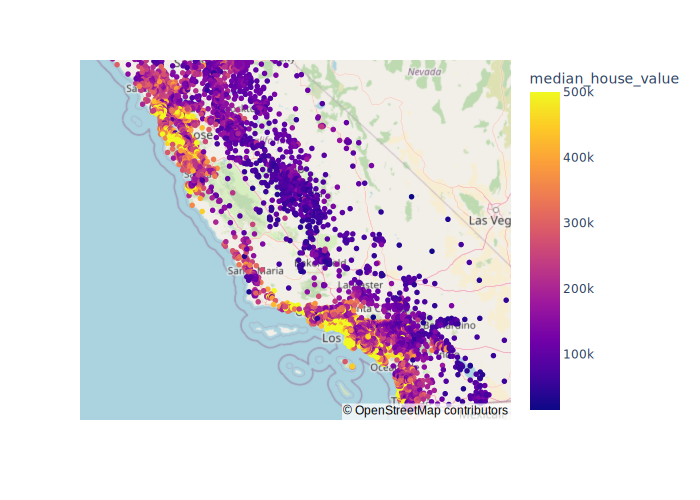

In [34]:
# Create scatter mapbox plot
fig8 = px.scatter_mapbox(df, lat='latitude', lon='longitude', color = 'median_house_value',
                        hover_data = ['total_rooms', 'total_bedrooms', 'population', 'median_income'], 
                        mapbox_style='open-street-map',
                        zoom = 5)

fig8.show('svg')

# **3.Model:**

In [24]:
lm = LinearRegression()

In [25]:
X = df[['housing_median_age']]
y = df['median_house_value']

lm.fit(X,y)

LinearRegression()

In [26]:
lm.score(X,y)


0.011156305266710742

In [27]:
#a intercept
lm.intercept_

179119.91658938475

In [28]:
#b slope
lm.coef_

array([968.44963974])

$$
Yhat = a + b  X
$$

**House value** = 179119.92 + 968.45 * housing_median_age

In [29]:
y = 179119.92 + 968.45*X